In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
json_path = '/Users/lucas/Desktop/UPC/MIT/mano_grasp/ycb_grasps/'

In [4]:
def read_grasp_json(json_path):

    
    grasp_info = []
    class_id = None

    with open(json_path) as json_file:
        reader = json.load(json_file)
        if isinstance(reader, dict):
            class_id = reader['object_id']
            reader = reader['grasps']

        for row_idx, row in enumerate(reader):
            hand_pose = np.array(row['mano_pose'])
            assert (len(hand_pose) == 48)
            hand_axisang = hand_pose[3:]

            grasp_info.append({
                'idx': row_idx,
                'class_id': row['body'].split('_')[0] if class_id is None else class_id,
                'pose': np.array(row['pose']),
                'hand_pose': hand_pose,
                'pca_pose': None,
                'hand_global_rot': hand_pose[:3],
                'hand_trans': np.array(row['mano_trans'][0]),
                'grasp_epsilon': row['epsilon'],
                'link_in_contact': row['link_in_contact'],
                'contacts': row['contacts']
            })

    return grasp_info

In [5]:
obj_grasps = {}

for json_file in os.listdir(json_path):
    filename, _ = os.path.splitext(json_file)


    json_pth = os.path.join(json_path, json_file)
    
    grasp_info = read_grasp_json(json_pth)
    
    obj_grasps[filename] = len(grasp_info)

In [6]:
p_info_pth = '/Users/lucas/Desktop/UPC/MIT/manopth/outputs/graspit_to_mano/ycb/'

pressure_grasps = {}

for obj_file in os.listdir(p_info_pth):
    obj_pth = os.path.join(p_info_pth, obj_file)
    
    pressure_grasps[obj_file[:-14]] = len(os.listdir(obj_pth))

In [7]:
obj_file


'077_rubiks_cube_pressure_info'

In [8]:
for grasp in obj_grasps:
    if obj_grasps[grasp] != pressure_grasps[grasp]:
        print(grasp, obj_grasps[grasp], pressure_grasps[grasp])

013_apple 121 74
026_sponge 50 41
055_baseball 154 129
072-b_toy_airplane 140 116
073-g_lego_duplo 87 72


In [9]:
json_file

'077_rubiks_cube.json'

# Plot grasps

### Read splits

In [65]:
ycb_pth = "C:/Users/lucas/Desktop/UPC/MIT/tactile2object/ycb/ycb_con/"

train_pth = os.path.join(ycb_pth, "train.lst")
with open(train_pth, "r") as file_handle:
    train_obj = file_handle.read().splitlines()
    
val_pth = os.path.join(ycb_pth, "val.lst")
with open(val_pth, "r") as file_handle:
    val_obj = file_handle.read().splitlines()
    
test_pth = os.path.join(ycb_pth, "test.lst")
with open(test_pth, "r") as file_handle:
    test_obj = file_handle.read().splitlines()
    
train_obj = sorted(train_obj)
val_obj = sorted(val_obj)
test_obj = sorted(test_obj)

all_obj = train_obj + val_obj + test_obj

### Generate dataframe

In [66]:
index = []
n_grasps = []
splits = []

for grasp in all_obj:
    index.append(grasp)
    n_grasps.append(pressure_grasps[grasp])
    
    if grasp in train_obj:
        split = 'train'
    elif grasp in val_obj:
        split = 'val'
    elif grasp in test_obj:
        split = 'test'
    splits.append(split)

### Object grasps

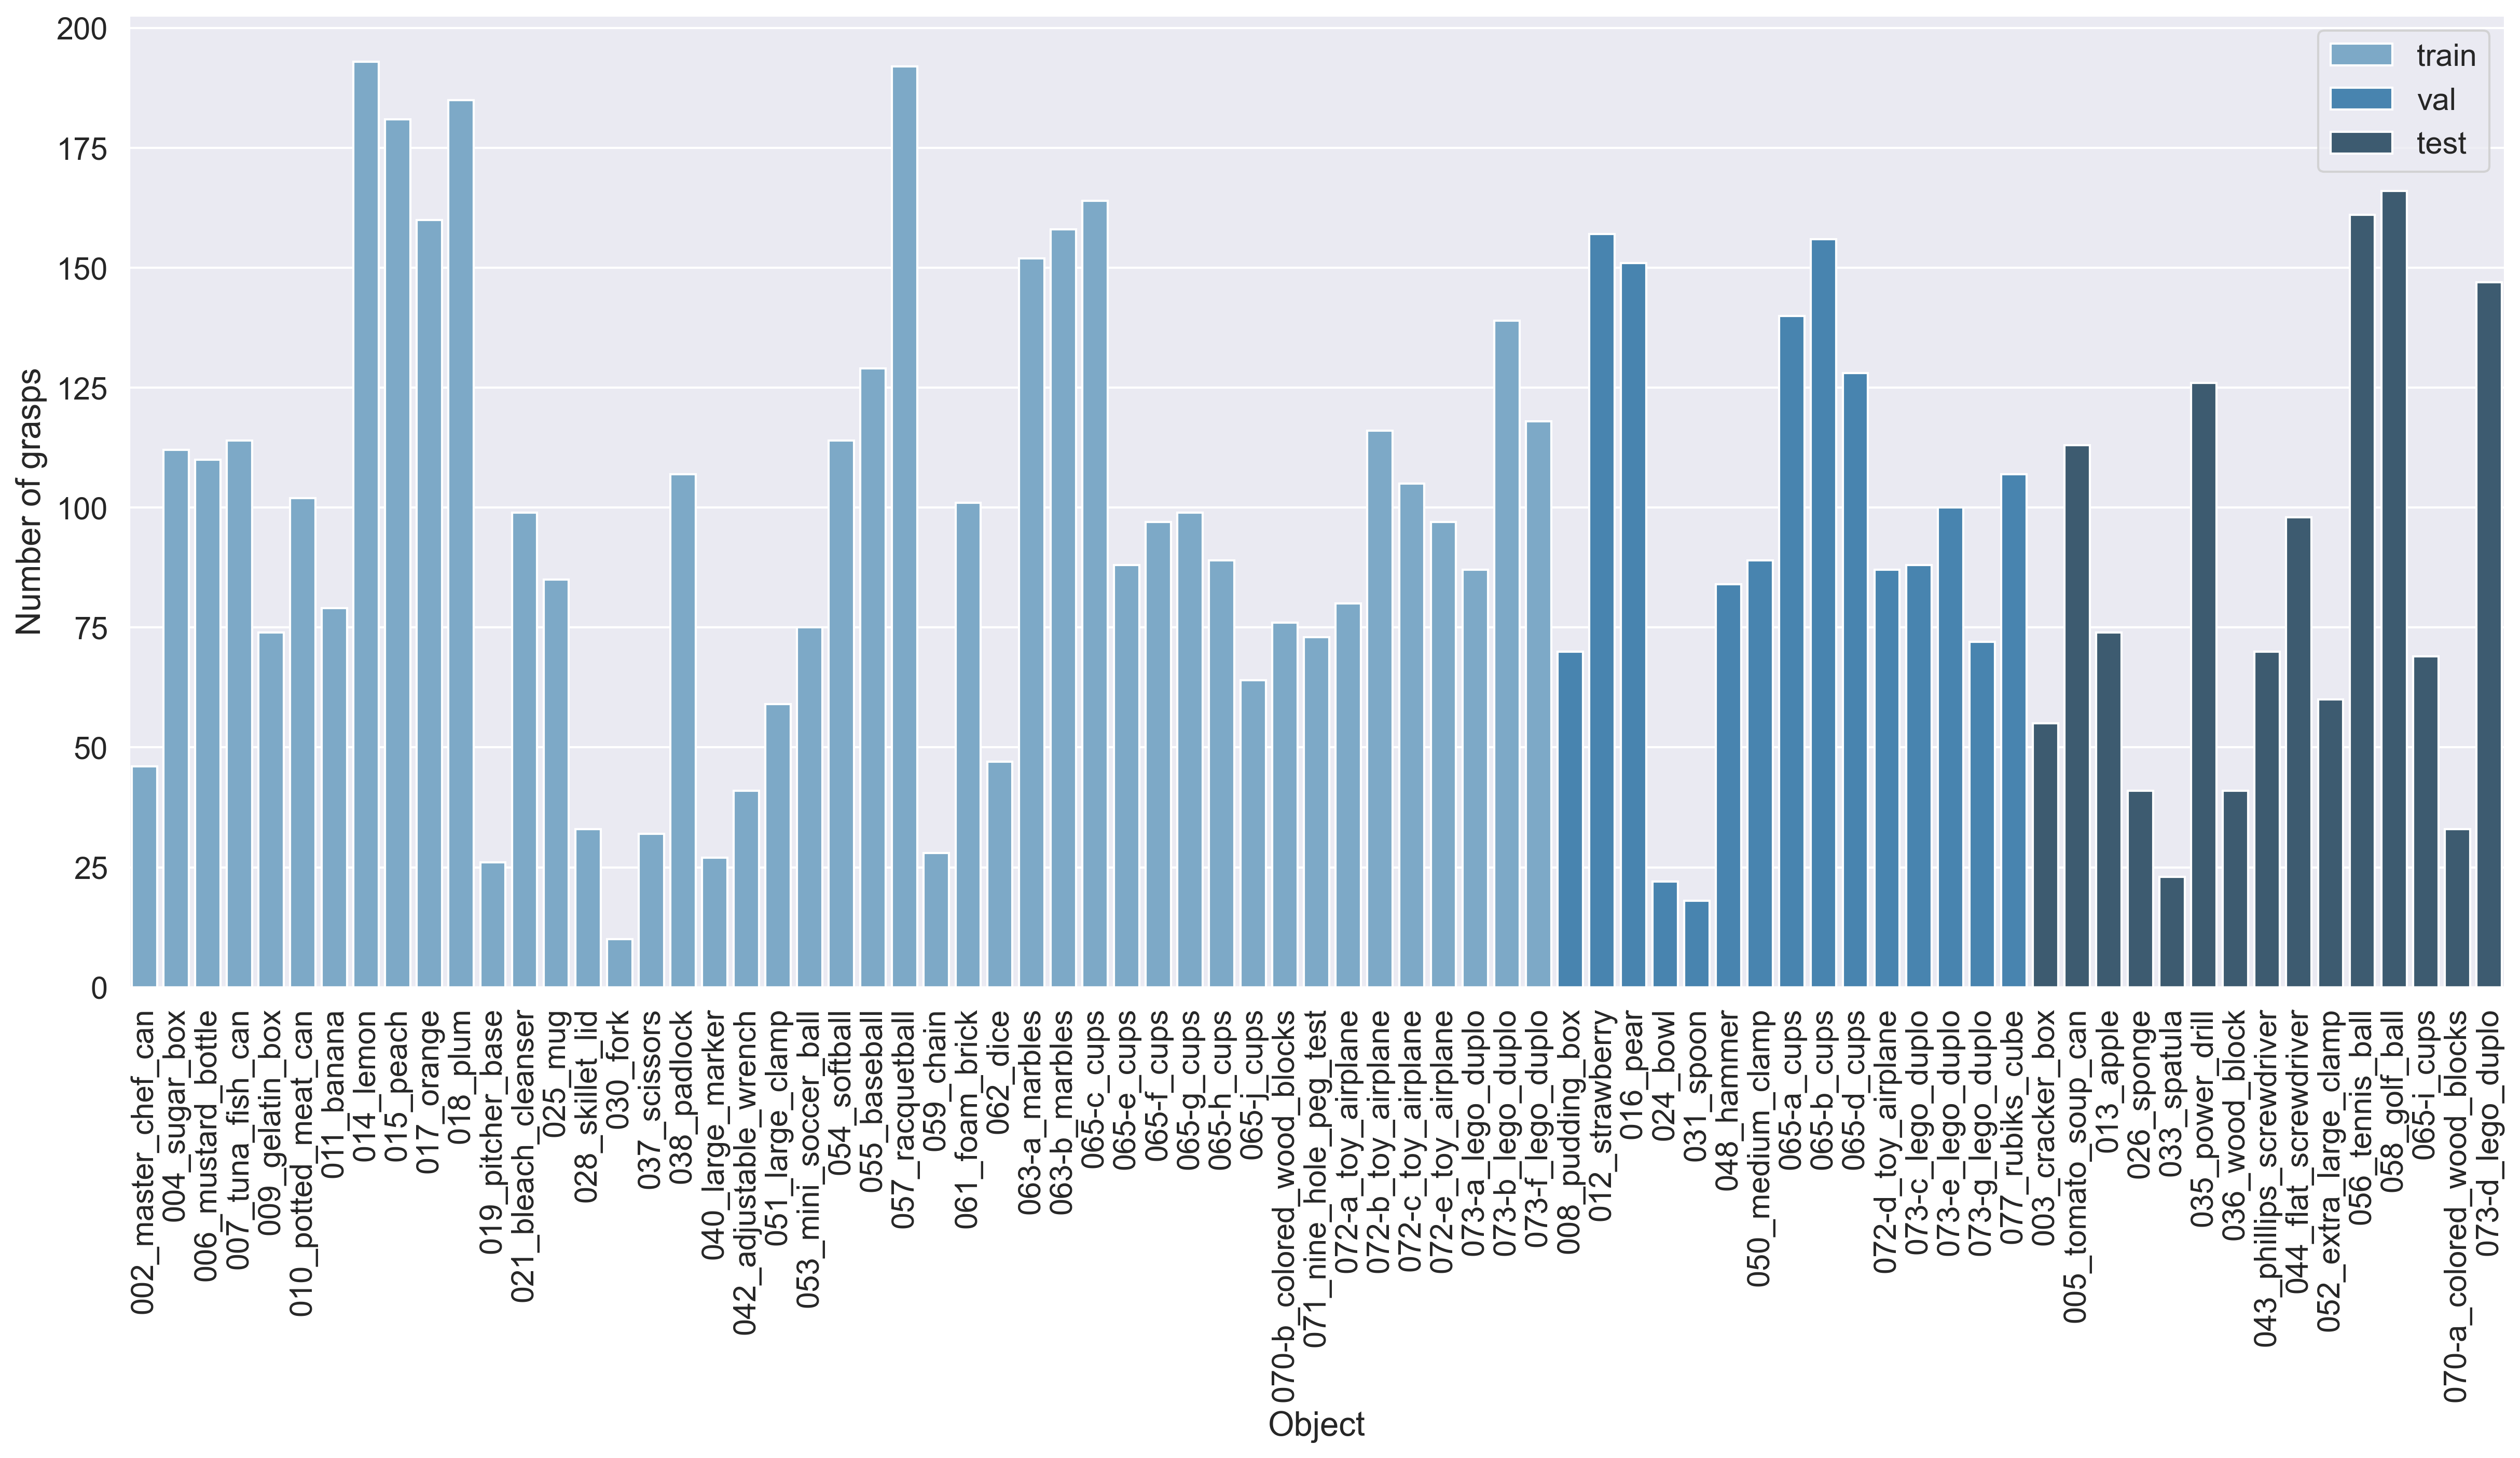

In [95]:
df = pd.DataFrame({'Number of grasps': n_grasps,
                   'split': splits,
                   'Object': index})

#df['Object'] = df['Object'].apply(lambda x: x.split('_')[0])

fig = plt.figure(dpi=300)
sns.set(rc={'figure.figsize':(19.7,8.27)})
sns.set(font_scale=1.3) 

plot = sns.barplot(data=df, x='Object', y='Number of grasps', hue="split", dodge=False, palette="Blues_d")
plot.get_legend().remove()
plt.setp(plot.get_xticklabels(), rotation=90)

plt.legend(loc='upper right')
plt.show()

### Histogram

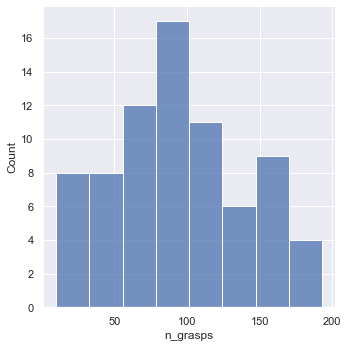

In [68]:
sns.set_theme()
sns.displot(df, x="n_grasps")